In [1]:
%load_ext autoreload
%autoreload 2

In [68]:
import numpy as np
import torch
import torch.nn as nn

_include_('curriculum_vqa')
_include_('commons')

seed = 1
np.random.seed(seed)
torch.manual_seed(seed);

from cvqa import datasets, models, trainers, viz
from commons import debug

data_bin = f'{DEV_HOME}/data-bin'

In [69]:
8.64e+19

8.64e+19

In [70]:
8.64*10**19

8.64e+19

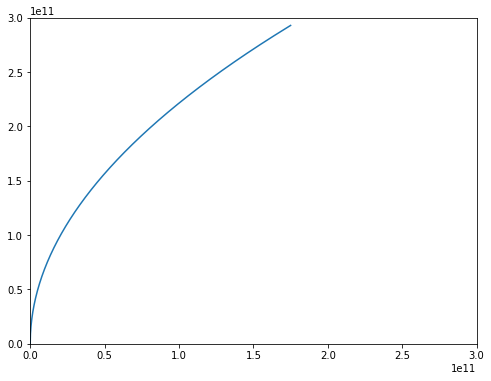

In [129]:
import matplotlib.pyplot as plt

M = 1e+6
B = 1e+9


N = np.linspace(0, 175*B, 1000)
D = 700000*np.sqrt(N)


fig, ax = plt.subplots(figsize=(8,6))
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlim(left=10, right=300*B)
ax.set_ylim(bottom=10, top=300*B)

# plt.xticks(ticks=[10**])

# plt.scatter([11000*M], [1000*B], label='T5-11B')
# plt.scatter([355*M], [2000*B], label='RoBERTa-Large')
# plt.scatter([174600*M], [300*B], label='GPT-3')

plt.plot(N, D);
# plt.legend();

In [104]:
import pandas as pd

df = pd.read_csv(f'{data_bin}/misc/gpt3-res.csv', sep=' ')

df['F-Z'] = df['FS_175B'] - df['ZS_175B']
df['SOTA-GPT3'] = df['SOTA'] - df['FS_175B']

COLS = ['Name', 'Metric', 'Split', 'SOTA', 'K', 'ZS_175B', 'OS_175B', 'FS_175B', 'F-Z', 'SOTA-GPT3']
df = df[COLS]
df = df[df['Metric'] == 'acc']
df = df[df['F-Z'] < 20]
df.sort_values('F-Z')

,Name,Metric,Split,SOTA,K,ZS_175B,OS_175B,FS_175B,F-Z,SOTA-GPT3
45,ANLI-R2,acc,test,50.7,50.0,35.4,33.9,34.0,-1.4,16.7
41,ReCoRD,acc,dev,92.5,32.0,90.2,90.2,89.0,-1.2,3.5
27,RACE-m,acc,test,93.1,10.0,58.4,57.4,58.1,-0.3,35.0
22,ARC(Challenge),acc,test,78.5,50.0,51.4,53.2,51.5,0.1,27.0
19,Winograd,acc,test,93.8,7.0,88.3,89.7,88.6,0.3,5.2
0,HellaSwag,acc,dev,85.6,20.0,78.9,78.1,79.3,0.4,6.3
35,Copa,acc,dev,94.8,32.0,91.0,87.0,92.0,1.0,2.8
21,PIQA,acc,dev,77.1,50.0,81.0,80.5,82.3,1.3,-5.2
23,ARC(Easy),acc,test,92.0,50.0,68.8,71.2,70.1,1.3,21.9
26,RACE-h,acc,test,90.0,10.0,45.5,45.9,46.8,1.3,43.2


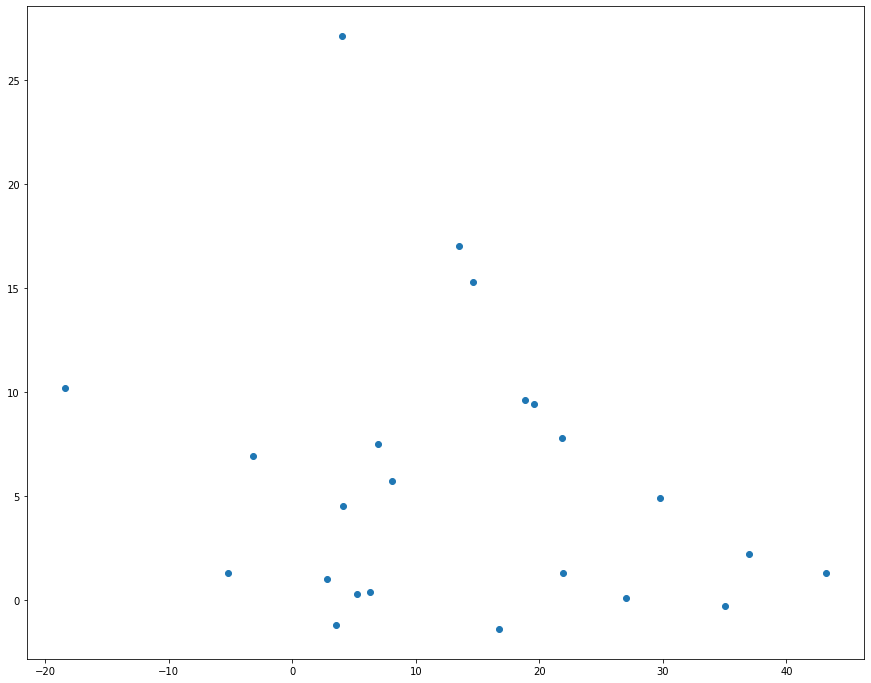

In [103]:
fig, ax = plt.subplots(figsize=(15,12))

ax.scatter(df['SOTA-GPT3'], df['F-Z']);


<AxesSubplot:>

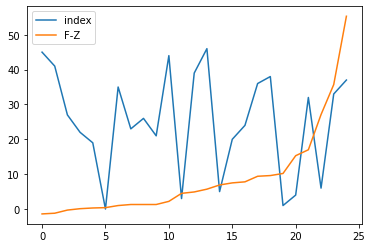

In [95]:
s = df['F-Z'].sort_values()
s.reset_index().plot()